In [1]:
# only for test

import csv
import glob, os
import pandas as pd

print('aa')
print(os.path.abspath('.'))

aa
C:\Users\mynam\Documents\GitHub\Video-Player-Controlled-by-Action-Recognition_wkr\src


In [2]:
# initialisation
# TODO: move all packages here but not for now

featureDict = {'down': {} , 'up': {}, 'left': {}, 'right': {}, 'fist': {}}


In [3]:
# load data from csv files
# feature extraction
# TODO: freq-domain features
# TODO: feature selection
# TODO: normalisation

import math
import numpy as np
import csv
import glob, os
import pandas as pd

# locate folers
actionList = ['down', 'up', 'left', 'right', 'fist']
for currentAction in range(len(actionList)):
    filePath = os.path.abspath('./Dataset/hyqData/' + actionList[currentAction])

    print(filePath)


    file = glob.glob(os.path.join(filePath, "*.csv"))


    dl = []
    for f in file:
        dl.append(pd.read_csv(f, header=None))



    # obtain each EMG channel data
    emg_1=[]
    emg_2=[]
    emg_3=[]

    featureList = []

    index=0
    i=0
    for index in range(len(dl)): # access all csv files

        for i in range(len(dl[index].values.tolist())): # access all recorded samples
            emg_1.append(dl[index].values.tolist()[i][0])
            emg_2.append(dl[index].values.tolist()[i][1])
            emg_3.append(dl[index].values.tolist()[i][2])


        ### calculate time-domain features

        # Mean Absolute Value
        MAV_emg_1 = 0
        MAV_emg_2 = 0
        MAV_emg_3 = 0
        # Wavelength
        WL_emg_1 = 0
        WL_emg_2 = 0
        WL_emg_3 = 0
        # Slope Sign Changes
        SSCthreshold = 0 # TODO: detemine the threshold
        SSC_emg_1 = 0
        SSC_emg_2 = 0
        SSC_emg_3 = 0
        # Zero Crossing: we don't have, do we?
        ZC_emg_1 = 0
        ZC_emg_2 = 0
        ZC_emg_3 = 0
        # Root Mean Square
        RMS_emg_1 = 0.0
        RMS_emg_2 = 0.0
        RMS_emg_3 = 0.0

        i=0
        temp1=0
        temp2=0
        temp3=0
        temp4=0
        temp5=0
        temp6=0
        temp7=0.0
        temp8=0.0
        temp9=0.0
        for i in range(len(emg_3)):
            temp1 = temp1 + abs(int(emg_1[i]))
            temp2 = temp2 + abs(int(emg_2[i]))
            temp3 = temp3 + abs(int(emg_3[i]))
            temp7 = temp7 + (int(emg_1[i]))**2
            temp8 = temp8 + (int(emg_2[i]))**2
            temp9 = temp9 + (int(emg_3[i]))**2

            if(i>0):
                WL_emg_1 = WL_emg_1 + abs(int(emg_1[i]) - int(emg_1[i-1]))
                WL_emg_2 = WL_emg_2 + abs(int(emg_2[i]) - int(emg_2[i-1]))
                WL_emg_3 = WL_emg_3 + abs(int(emg_3[i]) - int(emg_3[i-1]))

            if(i>1):
                temp4 = (int(emg_1[i-1]) - int(emg_1[i-2])) * (int(emg_1[i-1]) - int(emg_1[i]))
                temp5 = (int(emg_2[i-1]) - int(emg_2[i-2])) * (int(emg_2[i-1]) - int(emg_2[i]))
                temp6 = (int(emg_3[i-1]) - int(emg_3[i-2])) * (int(emg_3[i-1]) - int(emg_3[i]))
                if temp4 >= SSCthreshold:
                    SSC_emg_1 = SSC_emg_1 + 1
                if temp5 >= SSCthreshold:
                    SSC_emg_2 = SSC_emg_2 + 1
                if temp6 >= SSCthreshold:
                    SSC_emg_3 = SSC_emg_3 + 1



            MAV_emg_1 = temp1/len(emg_1)
            MAV_emg_2 = temp2/len(emg_2)
            MAV_emg_3 = temp3/len(emg_3)

            RMS_emg_1 = math.sqrt(temp7/len(emg_1))
            RMS_emg_2 = math.sqrt(temp8/len(emg_2))
            RMS_emg_3 = math.sqrt(temp9/len(emg_3))

        featureDict[actionList[currentAction]][index] = [MAV_emg_1, MAV_emg_2, MAV_emg_3, WL_emg_1, WL_emg_2, WL_emg_3, SSC_emg_1, SSC_emg_2, SSC_emg_3, RMS_emg_1, RMS_emg_2, RMS_emg_3]


    # print(MAV_emg_1, MAV_emg_2, MAV_emg_3)
    # print(WL_emg_1, WL_emg_2, WL_emg_3)
    # print(SSC_emg_1, SSC_emg_2, SSC_emg_3)
    # print(RMS_emg_1, RMS_emg_2, RMS_emg_3)


C:\Users\mynam\Documents\GitHub\Video-Player-Controlled-by-Action-Recognition_wkr\src\Dataset\hyqData\down
C:\Users\mynam\Documents\GitHub\Video-Player-Controlled-by-Action-Recognition_wkr\src\Dataset\hyqData\up
C:\Users\mynam\Documents\GitHub\Video-Player-Controlled-by-Action-Recognition_wkr\src\Dataset\hyqData\left
C:\Users\mynam\Documents\GitHub\Video-Player-Controlled-by-Action-Recognition_wkr\src\Dataset\hyqData\right
C:\Users\mynam\Documents\GitHub\Video-Player-Controlled-by-Action-Recognition_wkr\src\Dataset\hyqData\fist


In [4]:
# TODO: visualisation (if possible)

print(featureDict.keys())
print(len(featureDict['down']))
print(len(featureDict['up']))
print(len(featureDict['left']))
print(len(featureDict['right']))
print(len(featureDict['fist']))
print(featureDict['down'][0])
print(featureDict['up'][0])
print(featureDict['left'][0])
print(featureDict['right'][0])
print(featureDict['fist'][0])


dict_keys(['down', 'up', 'left', 'right', 'fist'])
25
25
25
25
30
[39.693333333333335, 55.17666666666667, 74.89666666666666, 499, 522, 1652, 219, 196, 215, 46.753894668430206, 64.37931862536809, 170.15286264611203]
[17.243333333333332, 171.14, 105.74333333333334, 40, 1030, 610, 297, 147, 157, 17.271460081108756, 216.06070134725258, 131.5700700514115]
[52.26, 71.05666666666667, 18.476666666666667, 964, 774, 168, 227, 198, 255, 85.64395289024594, 101.17929630117023, 27.522899556551085]
[59.38, 72.19, 59.7, 966, 705, 1261, 195, 174, 232, 76.48424674401913, 85.48288327690716, 137.3561550616984]
[58.67666666666667, 118.07333333333334, 32.553333333333335, 1285, 1341, 802, 226, 168, 234, 103.38170373265604, 130.02540777350657, 53.41891050929436]


In [21]:
# create labels for data samples
# TODO: weight init randomisation

from keras.utils import np_utils
x_val=[]
y_val=[]

def labelSwitch(arg):
    switcher = {
        'left': 1,
        'right': 2,
        'up': 3,
        'down': 4,
        'fist': 5
    }
    return switcher[arg]

i=0
j=''
dictLength=0
current = ['down', 'up', 'left', 'right', 'fist']
for j in range(len(current)):
    for i in range(len(featureDict[current[j]])):
        x_val.append(featureDict[current[j]][i])
        y_val.append(labelSwitch(current[j]))
        dictLength=dictLength+1

x_val_array = np.array(x_val)
y_val_array = np.array(y_val).reshape(dictLength,1)


state = np.random.get_state()
np.random.shuffle(x_val_array)
np.random.set_state(state)
np.random.shuffle(y_val_array)


TRAIN_SPLIT = int(0.6*x_val_array.shape[0])
TEST_SPLIT = int(0.2*x_val_array.shape[0] + TRAIN_SPLIT)


x_train, x_test, x_validate = np.split(x_val_array, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_test, y_validate = np.split(y_val_array, [TRAIN_SPLIT, TEST_SPLIT])



y_train_class = np_utils.to_categorical(y_train)
y_test_class = np_utils.to_categorical(y_test)
y_validate_class = np_utils.to_categorical(y_validate)


In [24]:
print(y_validate_class[0:10])

[[0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]]


Epoch 1/100
2/2 [==============================] - 0s 99ms/step - loss: 1.8816 - accuracy: 0.1667 - val_loss: 1.7489 - val_accuracy: 0.3077
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 1.7880 - accuracy: 0.4744 - val_loss: 1.6627 - val_accuracy: 0.6154
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 1.7018 - accuracy: 0.5513 - val_loss: 1.5833 - val_accuracy: 0.6154
Epoch 4/100
2/2 [==============================] - 0s 11ms/step - loss: 1.6220 - accuracy: 0.5385 - val_loss: 1.5102 - val_accuracy: 0.6154
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 1.5488 - accuracy: 0.5256 - val_loss: 1.4417 - val_accuracy: 0.6154
Epoch 6/100
2/2 [==============================] - 0s 11ms/step - loss: 1.4780 - accuracy: 0.5385 - val_loss: 1.3787 - val_accuracy: 0.6538
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 1.4159 - accuracy: 0.5769 - val_loss: 1.3205 - val_accuracy: 0.6538
Epoch 8/100
2/2 [===

Epoch 59/100
2/2 [==============================] - 0s 11ms/step - loss: 0.4150 - accuracy: 0.8333 - val_loss: 0.3901 - val_accuracy: 0.8462
Epoch 60/100
2/2 [==============================] - 0s 11ms/step - loss: 0.4108 - accuracy: 0.8333 - val_loss: 0.3859 - val_accuracy: 0.8462
Epoch 61/100
2/2 [==============================] - 0s 11ms/step - loss: 0.4066 - accuracy: 0.8333 - val_loss: 0.3822 - val_accuracy: 0.8462
Epoch 62/100
2/2 [==============================] - 0s 11ms/step - loss: 0.4027 - accuracy: 0.8333 - val_loss: 0.3783 - val_accuracy: 0.8462
Epoch 63/100
2/2 [==============================] - 0s 11ms/step - loss: 0.3989 - accuracy: 0.8333 - val_loss: 0.3746 - val_accuracy: 0.8462
Epoch 64/100
2/2 [==============================] - 0s 11ms/step - loss: 0.3951 - accuracy: 0.8333 - val_loss: 0.3713 - val_accuracy: 0.8462
Epoch 65/100
2/2 [==============================] - 0s 11ms/step - loss: 0.3916 - accuracy: 0.8333 - val_loss: 0.3683 - val_accuracy: 0.8462
Epoch 66/100


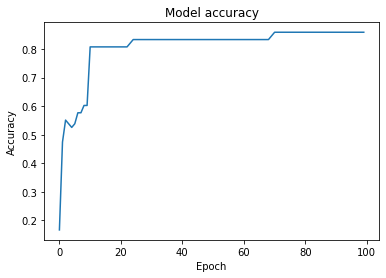

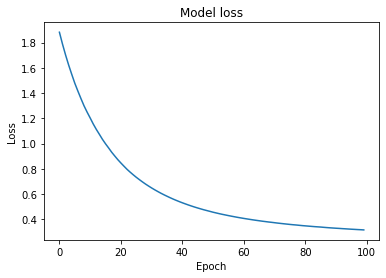

Test loss: 0.40345901250839233
Test accuracy: 0.692307710647583


In [30]:
# TODO: Model

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.optimizers import RMSprop
tf.random.set_seed(1234)

model = Sequential()

model.add(Dense(12, activation='tanh', input_shape=(x_train.shape)))
model.add(Dense(50, activation='tanh'))
# model.add(Dropout(0.25))
model.add(Dense(6, activation='softmax'))

# opt = RMSprop(lr=0.1, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history=model.fit(x_train, y_train_class, epochs=100, batch_size=40, validation_data=(x_validate, y_validate_class))

# Plot training accuracy
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training loss
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

score = model.evaluate(x_test, y_test_class, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [13]:
# temp block TBD

print(x_train.shape)
print(y_train.shape)
print(np.min(y_train))
print(y_train_class)

(130, 12)
(130, 1)
1
[[0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0.